In [17]:
# Pip install necessary package
%pip install --upgrade --quiet  pgvector
%pip install --upgrade --quiet  langchain-openai
%pip install --upgrade --quiet  langchain
%pip install --upgrade --quiet  psycopg2-binary
%pip install --upgrade --quiet  tiktoken
%pip install --upgrade --quiet  moviepy
%pip install --upgrade --quiet  eva-decord
%pip install --upgrade --quiet  openai-whisper
%pip install --upgrade --quiet  soundfile
%pip install --upgrade --quiet  SpeechRecognition
%pip install --upgrade --quiet  sentence-transformers
%pip install --upgrade --quiet  av
%pip install --upgrade --quiet torchvision==0.16.2 ftfy einops
%pip install --upgrade --quiet chromadb
%pip install --upgrade --quiet langchain_experimental
%pip install --upgrade --quiet google-generativeai langchain-google-genai

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install git+https://github.com/stlukey/whispercpp.py

  Cloning https://github.com/stlukey/whispercpp.py to /private/var/folders/cj/b27zth7d1gn3ktvbyzc3h69c0000gn/T/pip-req-build-hszj2qpi
  Running command git clone --filter=blob:none --quiet https://github.com/stlukey/whispercpp.py /private/var/folders/cj/b27zth7d1gn3ktvbyzc3h69c0000gn/T/pip-req-build-hszj2qpi
  Resolved https://github.com/stlukey/whispercpp.py to commit 7af678159c29edb3bc2a51a72665073d58f2352f
  Running command git submodule update --init --recursive -q
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.3/491.3 kB 3.9 MB/s eta 0:00:00a 0:00:01
  Created wheel for whispercpp: filename=whispercpp-1.0-cp311-cp311-macosx_11_0_arm64.whl size=226609 sha256=eb72407bc96b0940848f141cdfcd5cefd2665bb06a8307145db786e23013f724
  Stored in directory: /private/var/folders/cj/b27zth7d1gn3ktvbyzc3h69c0000gn/T/pip-ephem-wheel-cache-xanyysi0/wheels/b0/0d/ab/8

In [1]:
%pip install --upgrade --quiet pip install langchain_experimental

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import moviepy.editor as mpe
import speech_recognition as sr

filename = "Parks and Recreation - S07E05 - Gryzzlbox.mp4"

def get_dialog(filename):
    
    # Load the video file
    video = mpe.VideoFileClip(f"data/{filename}")

    video.audio.write_audiofile(r"data/converted.wav")

    # Convert the audio to text
    r = sr.Recognizer()

    audio = sr.AudioFile("data/converted.wav")

    with audio as source:
      audio_file = r.record(source)

    result = r.recognize_whisper(audio_file)

    # Print the text
    print(result)

    with open(f"data/{filename[:-4]}.txt", 'w') as f:
        f.write(result)

In [64]:
# Example: Using ChatGPT from openAI 
# Point to openAI
from dotenv import load_dotenv
from openai import OpenAI

load_dotenv(override=True)

client = OpenAI()

def get_chars_from_dialog(filename):
    
    with open(f"data/{filename[:-4]}.txt", 'r') as f:
        result = f.read()

    prompt = f"With the following dialog from a TV show, Who are main characters from the show: '{result}'"

    print(prompt)
    
    completion= client.chat.completions.create(
      model="gpt-4",
      messages=[
          {"role": "system", "content": "You are a TV executive assistant. You read scripts and summarize them. You give helpful summaries of those scripts"},
          {"role": "user", "content": prompt}
          ]
    )

    completion.choices[0].message

    print(completion.choices[0].message.content)

    with open(f'data/{filename[:-4]}.chars.out', 'w') as f:
        f.write(completion.choices[0].message.content)

get_chars_from_dialog(filename)    

With the following dialog from a TV show, Who are main characters from the show: ' Forget it. It's impossible. It's not gonna work in a million years. It's pointless. I give up. Good attitude, honey. Well, you know, what do you want from me? I'm trying to get a group of people to give me their land. Rather than sell it to Grizzle for $90 million. Right now my basic argument is, please give us the land. It would be so nice. Grizzle has billions of dollars. There's no way I beat them. Hey, I've seen you beat tougher odds than this. They're just a company. They're not that powerful. Well, open your door. Oh my god, Ben. We're about to die. Good Lord. The robots have come for us. I made fun of you when you said it would happen, but your novel has come true. Hey Leslie, no. Please enjoy this free gift. courtesy of Grizzle. Okay, so they also have a squadron of flying robots giving presents to everyone. Later. We're screwed. New dish we're working on. Tell me what you think. It's a red and w

In [66]:
def get_plot_from_dialog(filename):
    
    with open(f"data/{filename[:-4]}.txt", 'r') as f:
        result = f.read()

    prompt = f"With the following dialog from a TV show, give a summary of the plot of the episode.: '{result}'"

    completion = client.chat.completions.create(
    model="gpt-4",
    messages=[
        {"role": "system", "content": "You are a TV executive assistant. You read scripts and summarize them. You give helpful summaries of those scripts"},
        {"role": "user", "content": prompt}
        ]
    )

    print(completion.choices[0].message)

    with open(f'data/{filename[:-4]}.plot.out', 'w') as f:
        f.write(completion.choices[0].message.content)


ChatCompletionMessage(content="In this episode, the Pawnee Parks Department faces ethical challenges with tech company Grizzle whose free Wi-Fi service has been secretly gathering and using customer data for invasive marketing purposes. Leslie is asked to make a case against Grizzle on live television. However, she discovers that she unwittingly approved Grizzle's data mining clause while distracted by the release of Star Wars Episode 7. She feels responsible and fears public backlash similar to her Ice Town scandal.\n\nMeanwhile, April deals with her existential crisis by advising new interns not to waste their lives in the Parks Department. Tom becomes Andy's agent, managing to get him the rights of his TV character, Johnny Karate, and a higher salary. Donna, a Grizzle employee, reveals that the company knows her private nicknames for her husband, Joe. She aligns herself with Leslie in opposing Grizzle's invasive tactics. \n\nUnexpectedly, Ron Swanson comes to Leslie's aid after Griz

In [69]:
filename = "Farscape S01E01 Premiere.mp4"
get_dialog(filename)
get_chars_from_dialog(filename) 
get_plot_from_dialog(filename)

python(42597) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(42600) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(42601) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(42603) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(42607) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


MoviePy - Writing audio in data/converted.wav


MoviePy - Done.
 Lounge conditions as of 05 third-leer optimal. Final checks underway recovery craft in position. Mid 30s and holding meteorologist got some hiccup to check him out. See our latest press? Childhood friends out to prove a theory. Can a man spacecraft overcome atmospheric friction and exponentially increase its speed using only a planet's natural gravitational pull? Huh? Man, what is wrong with you? DK, you know that feeling you get and I bet for something big is about to happen in your life. It's the night before we graduated high school. It's the night before we started this job. Why have that feeling last night in quarantine? This experiment, that important here? One small step, but hey DK, sorry. We're looking pretty sharp there, Commander Critan. Thanks dad. Let's do this thing. I taught to Pete Maxwell and the others to control. They're going to take real good care of you while you're up there. I heard that you went AWOL from the rat cage this morning. Man, in my da

In [11]:
from langchain.docstore.document import Document
from langchain.text_splitter import CharacterTextSplitter
from langchain_community.document_loaders import TextLoader
from langchain_community.vectorstores.pgvector import PGVector
from langchain_openai import OpenAIEmbeddings
from langchain.embeddings import HuggingFaceEmbeddings

In [138]:
def get_caption_for_index(index: int):

    cap = caption_image(vr.get_batch([index]).asnumpy()[0])
    timestamps = vr.get_frame_timestamp([index, index + SKIP])

    (first, _), (_, last) = timestamps

    _in = str(datetime.timedelta(seconds=float(first)))
    _out = str(datetime.timedelta(seconds=float(last)))

    cap = f"Timecode: {_in} - {_out}\ncaption: {cap}"
    return cap

Timecode: 0:10:25.521240 - 0:10:26.897400
caption: a woman in a black dress talking to another woman



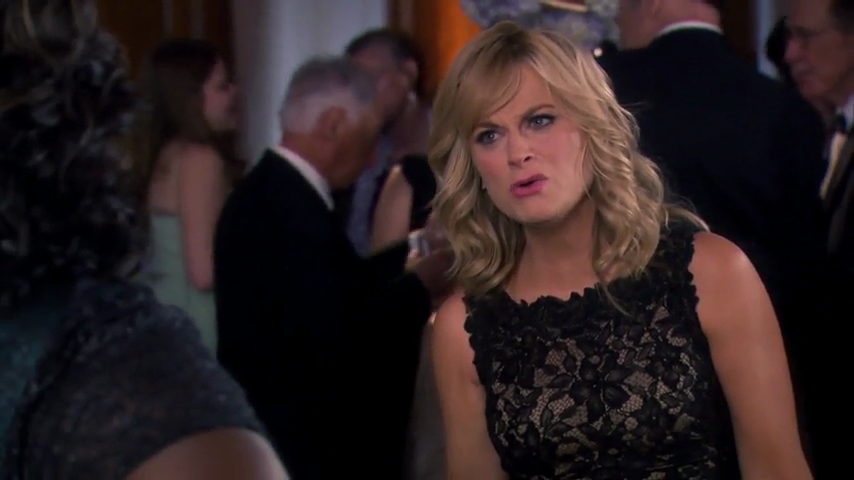

In [139]:
from PIL import Image

index = 15000
print(get_caption_for_index(index))
Image.fromarray(vr.get_batch([index]).asnumpy()[0])

In [1]:
import os
os.environ["PYTORCH_ENABLE_MPS_FALLBACK"] = "1"

import torch
torch.set_default_device("mps")

from PIL import Image

from decord import VideoReader, cpu, AVReader

filename = "Parks and Recreation - S07E01 - 2017.mp4"

# Load the viedo
vr = VideoReader(f"data/{filename}", ctx=cpu(0))

In [2]:
# Use the BLIP model to create captions to be stored in the vector DB
from transformers import Blip2Processor, Blip2ForConditionalGeneration

processor = Blip2Processor.from_pretrained("Salesforce/blip2-opt-2.7b", torch_dtype=torch.float16, device='mps')
model = Blip2ForConditionalGeneration.from_pretrained("Salesforce/blip2-opt-2.7b", torch_dtype=torch.float16).to('mps')

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

/Users/ramundson/miniforge3/envs/base3.11/lib/python3.11/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


In [3]:
# Image captioning function
@torch.no_grad()
def caption_image(input_image: Image.Image):

    # Process the image
    inputs = processor(input_image, return_tensors="pt")

    # Generate a caption for the image
    out = model.generate(**inputs, max_new_tokens=150)

    # Decode the generated tokens to text
    caption = processor.decode(out[0], skip_special_tokens=True)

    return caption

caption_image(vr.get_batch([15000]).asnumpy()[0])

'a woman in a black dress talking to another woman\n'

In [ ]:
# Allow fallback
import os
import io
import base64
os.environ["PYTORCH_ENABLE_MPS_FALLBACK"] = "1"

import numpy as np
import torch
from tqdm import tqdm
import datetime

# default to MPS
torch.set_default_device("mps")

from whispercpp import Whisper
from decord import VideoReader, cpu, AVReader

# Models 
w = Whisper('small')

multimodal_embeddings = []
multimodal_meta = []

SKIP = 32
SAMPLE_RATE = 16000
AUDIO_PADDING = 16
filename = "Parks and Recreation - S07E01 - 2017.mp4"

# Load the viedo
vr = VideoReader(f"data/{filename}", ctx=cpu(0))
av = AVReader(f"data/{filename}", ctx=cpu(0), sample_rate=SAMPLE_RATE)

total_frame_num = len(vr)

frame_list = range(0, len(vr) - 1, SKIP)
captions = []
multimodal_meta = []
images = []

def add_timestamp(SKIP, vr, total_frame_num, frame_list, i):
    
    timestamps = vr.get_frame_timestamp([frame_list[i], min(total_frame_num -1, frame_list[i] + SKIP)])

    (first, _), (_, last) = timestamps

    _in = str(datetime.timedelta(seconds=float(first)))
    _out = str(datetime.timedelta(seconds=float(last)))

    return _in, _out


for i, frame in enumerate(tqdm(vr.get_batch(frame_list).asnumpy())):

    raw_image = Image.fromarray(frame).convert('RGB')

    image_uri = pillow_image_to_base64_string(raw_image)
    images.append(image_uri)

    audio, _ = av[max(0, frame_list[i] - AUDIO_PADDING):min(total_frame_num - 1, frame_list[i] + SKIP + AUDIO_PADDING)]

    audio_array = np.array([])
    for a in audio:
        audio_array = np.append(audio_array, a.asnumpy())

    result = w.transcribe(audio_array.astype('float32'))
    text = w.extract_text(result)

    caption = caption_image(raw_image)

    _in, _out = add_timestamp(SKIP, vr, total_frame_num, frame_list, i)

    captions.append(f"Timecode: {_in} - {_out}\ncaption: {caption}\ndialog: {text}")
    metadata = {"in": _in, "out": _out, "frame": i, "caption": caption, "dialog": text}
    multimodal_meta.append(metadata)



In [122]:
vr.get_frame_timestamp([frame_list[i], min(total_frame_num -1, frame_list[i] + SKIP)])

array([[1290.4087, 1290.4503],
       [1290.6589, 1290.7006]], dtype=float32)

In [7]:
# open file
with open('./data/parks_and_recreation.S07E01.captions.txt', 'w+') as f:
     
    # write elements of list
    for items in captions:
        f.write('%s\n' % items.strip())
     
    print("File written successfully")


# open file
with open('./data/parks_and_recreation.S07E01.multimodal_meta.txt', 'w+') as f:
     
    # write elements of list
    for items in multimodal_meta:
        f.write('%s\n' % items)
     
    print("File written successfully")


# open file
with open('./data/parks_and_recreation.S07E01.images.txt', 'w+') as f:
     
    # write elements of list
    for items in images:
        f.write('%s\n' % items)
     
    print("File written successfully")



File written successfully
File written successfully
File written successfully


In [8]:
# Load lists from file
import json

with open('./data/parks_and_recreation.S07E01.images.txt') as file:
    images = [line.strip() for line in file]

with open('./data/parks_and_recreation.S07E01.multimodal_meta.txt') as file:
    multimodal_meta = [line.strip() for line in file]

with open('./data/parks_and_recreation.S07E01.captions.txt') as file:
    captions = [line.strip() for line in file]

multimodal_meta = [eval(i) for i in multimodal_meta]

In [9]:
captions[5]

"Timecode: 0:00:06.672227 - 0:00:08.048373\ncaption: a woman in a suit and a man in a tuxedo\n\ndialog: [' it next month, but they must have gotten impatient.']"

In [13]:
import uuid

from langchain.embeddings import OpenAIEmbeddings
from langchain_community.vectorstores import Chroma
from langchain.retrievers.multi_vector import MultiVectorRetriever
from langchain.schema.document import Document
from langchain.schema.output_parser import StrOutputParser
from langchain.storage import InMemoryStore
from dotenv import load_dotenv

load_dotenv(override=True)

IMAGE_TAG = "<image>"


def create_multi_vector_retriever(vectorstore, image_summaries, images):
    """
    Create retriever that indexes summaries, but returns raw images or texts

    :param vectorstore: Vectorstore to store embedded image sumamries
    :param image_summaries: Image summaries
    :param images: Base64 encoded images
    :return: Retriever
    """

    # Initialize the storage layer
    store = InMemoryStore()
    id_key = "doc_id"

    # Create the multi-vector retriever
    retriever = MultiVectorRetriever(
        vectorstore=vectorstore,
        docstore=store,
        id_key=id_key,
    )

    # Helper function to add documents to the vectorstore and docstore
    def add_documents(retriever, doc_summaries, doc_contents):
        doc_ids = [str(uuid.uuid4()) for _ in doc_contents]
        summary_docs = [
            Document(page_content=s, metadata={id_key: doc_ids[i]})
            for i, s in enumerate(doc_summaries)
        ]
        retriever.vectorstore.add_documents(summary_docs)
        retriever.docstore.mset(list(zip(doc_ids, doc_contents)))

    zip(image_summaries, images)
    add_documents(retriever, image_summaries, images)

    return retriever


# The vectorstore to use to index the summaries
vectorstore_mvr = Chroma(
    collection_name="multi-modal-parks_and_recreation-S07E01", embedding_function=OpenAIEmbeddings()
)


cap_and_image = [f"{c} {IMAGE_TAG}{i}" for  c, i in zip(captions, images)]

# Create retriever
retriever_multi_vector_img = create_multi_vector_retriever(
    vectorstore_mvr,
    captions,
    cap_and_image,
)

python(20297) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


In [142]:
# Delete vector store if reloading it
# vectorstore_mvr.delete_collection()

["Timecode: 0:04:25.554626 - 0:04:26.930786\ncaption: a man in a karate outfit is smiling\n\ndialog: [' Please.', ' (knocking)'] <image>",
 "Timecode: 0:04:24.220184 - 0:04:25.596344\ncaption: a man in karate gear is standing in front of a red couch\n\ndialog: [' - All right, guys, three more kicks a piece.'] <image>",
 "Timecode: 0:04:16.213501 - 0:04:17.589661\ncaption: a man in karate gear standing in front of a red couch\n\ndialog: [' I have something for you.'] <image>",
 "Timecode: 0:04:22.885742 - 0:04:24.261871\ncaption: a man in a karate outfit is laughing\n\ndialog: [' Okay guys, three more kicks of p-'] <image>"]
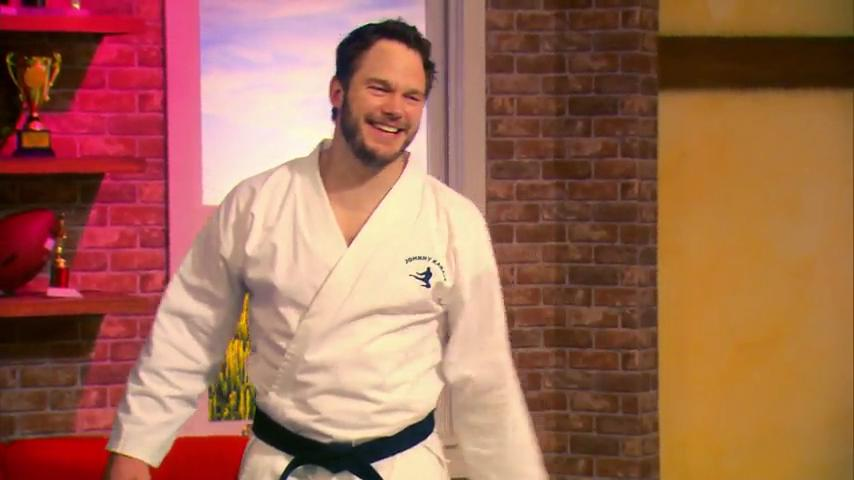
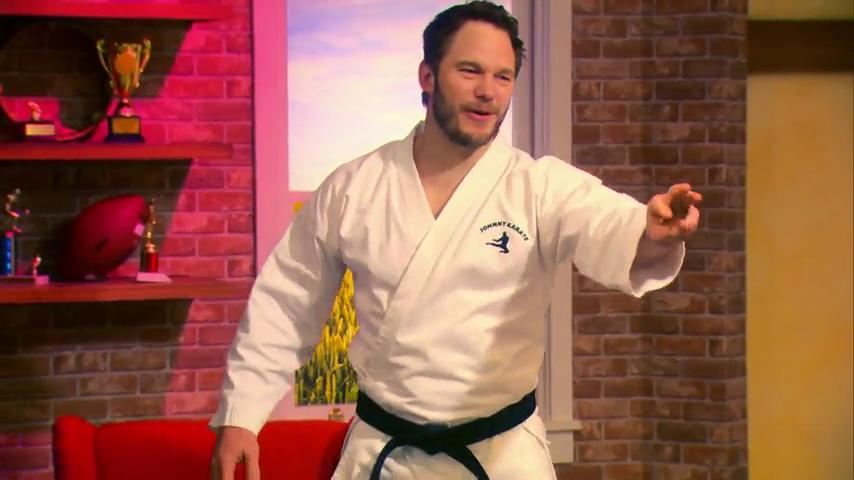
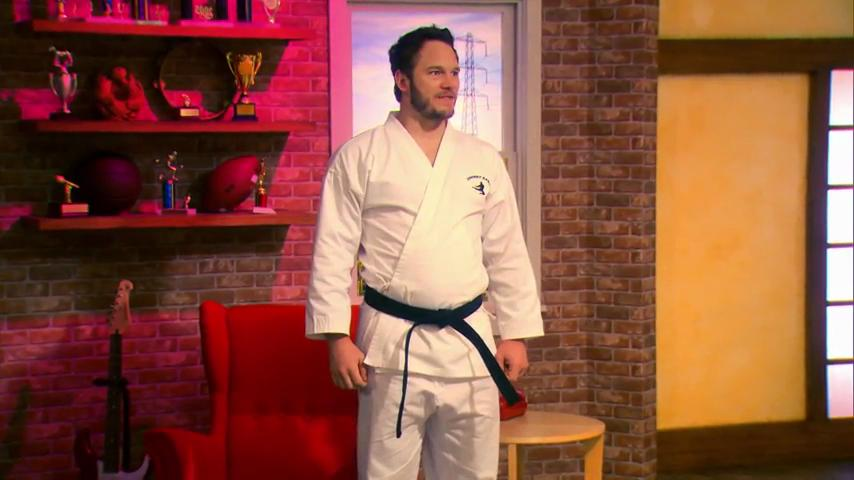
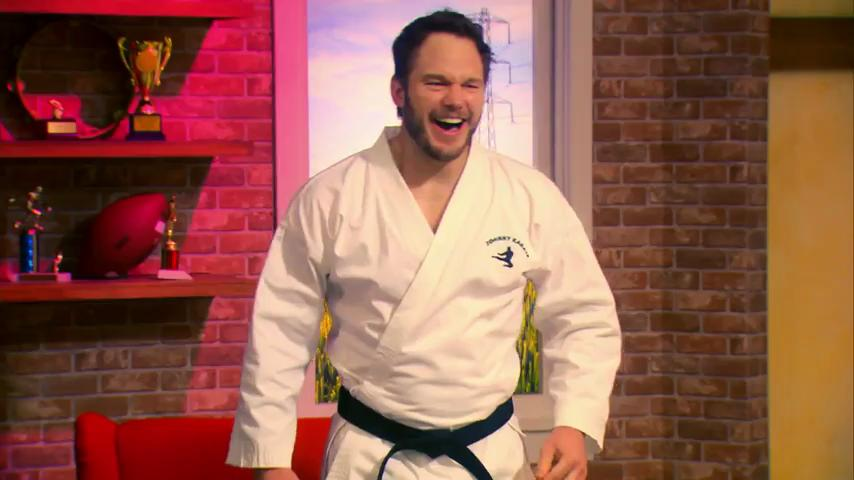

In [14]:
retriever_multi_vector_img.get_relevant_documents("What scenes involve karate?")

In [72]:
import importlib
import chromadb

importlib.reload(chromadb)
import numpy as np
from langchain_community.vectorstores import Chroma
from langchain_experimental.open_clip import OpenCLIPEmbeddings
from PIL import Image

def pillow_image_to_base64_string(img):
    buffered = io.BytesIO()
    img.save(buffered, format="JPEG")
    return 'data:image/jpeg;base64,' + base64.b64encode(buffered.getvalue()).decode("utf-8")


def base64_string_to_pillow_image(base64_str):
    return Image.open(io.BytesIO(base64.decodebytes(bytes(base64_str, "utf-8"))))

# Create chroma
vectorstore = Chroma(
    collection_name="parks_and_recreation.S07E01.images", embedding_function=OpenCLIPEmbeddings()
)

# Add images
ids = vectorstore.add_images(uris=images)

# Add documents
vectorstore.add_texts(texts=captions, ids=ids)

# Make retriever
retriever = vectorstore.as_retriever()

In [73]:
retriever.get_relevant_documents("What shots happen at a party?")

[Document(page_content='a man in a tuxedo holding a drink at a party\n'),
 Document(page_content='a man in a tuxedo holding a drink at a party\n'),
 Document(page_content='a woman in a black dress is dancing at a party\n'),
 Document(page_content='a woman in a black dress is dancing at a party\n')]

In [29]:
# Helper functions for LLM chatbot

import base64
import io

import numpy as np
from PIL import Image
from IPython.display import HTML, display

def pillow_image_to_base64_string(img):
    buffered = io.BytesIO()
    img.save(buffered, format="JPEG")
    return 'data:image/jpeg;base64,' + base64.b64encode(buffered.getvalue()).decode("utf-8")


def base64_string_to_pillow_image(base64_str):
    return Image.open(io.BytesIO(base64.decodebytes(bytes(base64_str, "utf-8"))))

def resize_base64_image(base64_string, size=(128, 128)):
    """
    Resize an image encoded as a Base64 string.

    Args:
    base64_string (str): Base64 string of the original image.
    size (tuple): Desired size of the image as (width, height).

    Returns:
    str: Base64 string of the resized image.
    """
    # Decode the Base64 string
    #img_data = base64.b64decode(base64_string)
    img = Image.open(io.BytesIO(base64.decodebytes(bytes(base64_string.removeprefix('data:image/jpeg;base64,'), "utf-8"))))

    # Resize the image
    resized_img = img.resize(size, Image.LANCZOS)

    # Save the resized image to a bytes buffer
    buffered = io.BytesIO()
    resized_img.save(buffered, format=img.format)

    # Encode the resized image to Base64
    return base64.b64encode(buffered.getvalue()).decode("utf-8")


def is_base64(s):
    """Check if a string is Base64 encoded"""
    try:
        return base64.b64encode(base64.b64decode(s)) == s.encode()
    except Exception:
        return False


def split_image_text_types(docs):
    """Split numpy array images and texts"""
    images = []
    text = []

    for doc in docs:
        if type(doc) is str:

            image_and_text = doc.split(IMAGE_TAG)
            # Just an image returned
            images.append(
                resize_base64_image(image_and_text[1], size=(250, 250))
            )
            text.append(image_and_text[0])
        else:
            doc = doc.page_content  # Extract Document contents
            if is_base64(doc):
                # Resize image to avoid OAI server error
                images.append(
                    resize_base64_image(doc, size=(250, 250))
                )  # base64 encoded str
            else:
                text.append(doc)
    return {"images": images, "texts": text}

def plt_img_base64(img_base64):
    # Create an HTML img tag with the base64 string as the source
    image_html = f'<img src="data:image/jpeg;base64,{img_base64}" />'

    # Display the image by rendering the HTML
    display(HTML(image_html))

In [37]:
from operator import itemgetter

from langchain.chat_models import ChatOpenAI
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_core.messages import HumanMessage, SystemMessage
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnableLambda, RunnablePassthrough,RunnableParallel


def prompt_func(data_dict):
    # Joining the context texts into a single string
    formatted_texts = "\n".join(data_dict["context"]["texts"])
    messages = []

    # Adding image(s) to the messages if present
    if data_dict["context"]["images"]:
        image_message = {
            "type": "image_url",
            "image_url": {
                "url": f"data:image/jpeg;base64,{data_dict['context']['images'][0]}"
            },
        }
        messages.append(image_message)

    # Adding the text message for analysis
    text_message = {
        "type": "text",
        "text": (
            "As an expert in movies and TV analysis, "
            "analyze the still fram and dialog content from popular TV or movies. Alongside the images, you will be "
            "provided with captions to offer more context. Both will be retrieved from a vectorstore based "
            "on user-input keywords. Please use your extensive knowledge and analytical skills to provide a "
            "comprehensive summary that includes:\n"
            "- A description and summary of the visual elements in the image.\n"
            "- Who is in the image and what is happening.\n"
            "- Any timecodes that can be ascertained.\n"
            "- What type of shot is used in the scenes\n"
            "- Connections between the image and the related text.\n\n"
            f"User-provided keywords: {data_dict['question']}\n\n"
            "Text and / or tables:\n"
            f"{formatted_texts}"
        ),
    }
    messages.append(text_message)

    return [HumanMessage(content=messages)]

In [31]:

model = ChatOpenAI(temperature=0,
                   model="gpt-4-vision-preview",
                   max_tokens=1024)

# RAG pipeline
chain = (
    {
        "context": retriever_multi_vector_img | RunnableLambda(split_image_text_types),
        "question": RunnablePassthrough(),
    }
    | RunnableParallel({"response": prompt_func | model | StrOutputParser(),
                      "context": itemgetter("context"),})
)

The image provided appears to be a night shot of the front entrance to a hotel. The visual elements include the illuminated facade of the hotel, with a large arched window and a well-lit entrance that suggests a welcoming atmosphere. The architecture has a classic and possibly luxurious feel, indicated by the use of columns and decorative elements. There are no people visible in the shot, which is common for an establishment shot, as it is meant to set the scene rather than focus on characters.

The image corresponds to the first text snippet, with a timecode of 0:07:40.383667 - 0:07:41.759796, and the caption "the front entrance to a hotel at night." The dialog, "And on the phone to Washington, call in every favor that we have," suggests a scene involving characters who are likely inside the hotel, engaged in a conversation about seeking assistance or intervention from a higher authority or connections in Washington, D.C.

The type of shot used here is an establishment shot, which is 


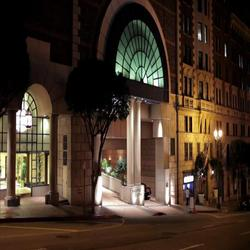


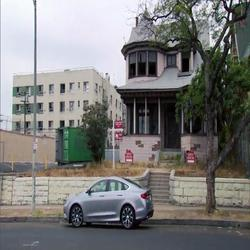

In [40]:
from dotenv import load_dotenv

load_dotenv(override=True)

response = chain.invoke("What are some location establishment shots? Where are the locations?")
#
print(response['response'])
plt_img_base64(response['context']['images'][0])
plt_img_base64(response['context']['images'][1])


The image provided appears to be a still frame from a television show or movie featuring a party sequence. In the image, we see a man in a tuxedo speaking closely with a woman in a red dress. The setting suggests a formal event or gathering, and the close proximity of the two characters implies a personal or intimate conversation.

Based on the user-provided keywords and the accompanying text, we can infer that this image is likely from the beginning of the party sequence, as the first timecode given is 0:09:27.139282. The caption associated with this timecode describes "a man in a tuxedo talking to a woman in a red dress," which matches the visual content of the image.

The dialog, "This is gonna be fun. What do you want to do first?" suggests that the characters are anticipating enjoying the party and are deciding on what activities to engage in. The subsequent timecodes and captions indicate that the party sequence continues with various events, such as dancing and a moment where so


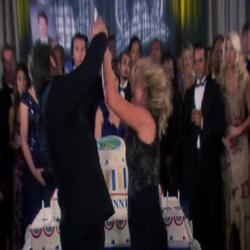

In [38]:
response = chain.invoke("When is the party sequence? What is the first timecode?")
#
print(response['response'])
plt_img_base64(response['context']['images'][1])

In the provided image, we see a man dressed in traditional karate attire, which includes a white gi (karate uniform) and a blue belt, indicating a level of proficiency but not mastery (as black would signify). He is standing with a relaxed but attentive posture in what appears to be a staged indoor setting, possibly a set for a television show, given the presence of a red couch and stylized background that doesn't resemble a typical dojo environment.

The image does not provide a timecode, but based on the text provided, the first timecode mentioned is 0:04:16.213501. This suggests that the image could be from around that moment in the sequence, although without the exact timecode on the image, it's not possible to confirm this with certainty.

The type of shot used here seems to be a medium shot, capturing the subject from approximately waist up, which is common in television as it allows viewers to see the character's body language and facial expressions clearly while still providing


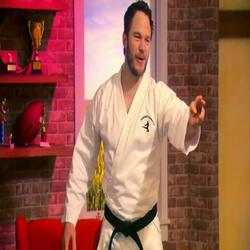

In [34]:
response = chain.invoke("What is happening in the karate sequence? What is the first timecode?")
#
print(response['response'])
plt_img_base64(response['context']['images'][1])

The image provided shows a man in a suit and tie making a facial expression that could be interpreted as a grimace or a forced smile. He appears to be standing in a well-lit, indoor setting, possibly an office or a room within a house, given the presence of a desk and what seems to be a lamp in the background. The decor includes framed pictures on the wall, suggesting a personal or professional space.

Based on the user-provided keywords and the accompanying text, it seems that this image is associated with a sequence that includes music, as indicated by the dialog text ' [MUSIC]'. The timecode provided for this particular image is 0:16:48.840698 - 0:16:50.216858, which indicates the specific moment in the TV show or movie when this scene occurs.

The type of shot used here appears to be a medium close-up, focusing on the upper body of the man, which is a common choice for showing a character's facial expressions and reactions in detail.

The connection between the image and the relate


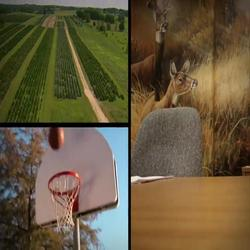

In [41]:
response = chain.invoke("What are some sequences with music? What is the first timecode?")
#
print(response['response'])
plt_img_base64(response['context']['images'][1])